In [1]:
!head -n 10 babynames/yob1994.txt

In [2]:
import pandas as pd

In [3]:
names1994 = pd.read_csv('babynames/yob1994.txt', names=['name', 'sex', 'births'])

In [4]:
names1994

,name,sex,births
0,Jessica,F,32117
1,Ashley,F,30278
2,Emily,F,24148
3,Samantha,F,22817
4,Sarah,F,22281
5,Taylor,F,20731
6,Brittany,F,18899
7,Amanda,F,18715
8,Elizabeth,F,16778
9,Megan,F,16578


In [14]:
years = range(1880, 2015)

In [15]:
pieces = []

In [16]:
columns = ['name', 'sex', 'births']

In [21]:
for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [22]:
names = pd.concat(pieces, ignore_index=True)

In [23]:
names

,name,sex,births,year
0,Emma,F,20886,2014
1,Olivia,F,19761,2014
2,Sophia,F,18563,2014
3,Isabella,F,17027,2014
4,Ava,F,15660,2014
5,Mia,F,13484,2014
6,Emily,F,12622,2014
7,Abigail,F,12049,2014
8,Madison,F,10291,2014
9,Charlotte,F,10094,2014


In [25]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [26]:
total_births.tail()

sex,F,M
year,,
2010,1773440,1914629
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,3554484,3821752


In [27]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

In [28]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [29]:
names

,name,sex,births,year,prop
0,Emma,F,20886,2014,0.005876
1,Olivia,F,19761,2014,0.005559
2,Sophia,F,18563,2014,0.005222
3,Isabella,F,17027,2014,0.004790
4,Ava,F,15660,2014,0.004406
5,Mia,F,13484,2014,0.003794
6,Emily,F,12622,2014,0.003551
7,Abigail,F,12049,2014,0.003390
8,Madison,F,10291,2014,0.002895
9,Charlotte,F,10094,2014,0.002840


In [31]:
import numpy as np

In [32]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [36]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [37]:
grouped = names.groupby(['year', 'sex'])

In [38]:
top1000 = grouped.apply(get_top1000)

In [39]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   33176         Mary   F    7065  1880  0.077644
         33177         Anna   F    2604  1880  0.028618
         33178         Emma   F    2003  1880  0.022013
         33179    Elizabeth   F    1939  1880  0.021310
         33180       Minnie   F    1746  1880  0.019189
         33181     Margaret   F    1578  1880  0.017342
         33182          Ida   F    1472  1880  0.016177
         33183        Alice   F    1414  1880  0.015540
         33184       Bertha   F    1320  1880  0.014507
         33185        Sarah   F    1288  1880  0.014155
         33186        Annie   F    1258  1880  0.013825
         33187        Clara   F    1226  1880  0.013474
         33188         Ella   F    1156  1880  0.012704
         33189     Florence   F    1063  1880  0.011682
         33190         Cora   F    1045  1880  0.011485
         33191       Martha   F    1040  1880  0.011430
         33192        Laura   F    1012  1880  0.011122
         33193       Nellie   F     995  1880  0.010935
         33194        Grace   F     982  1880  0.010792
         33195       Carrie   F     949  1880  0.010429
         33196        Maude   F     858  1880  0.009429
         33197        Mabel   F     808  1880  0.008880
         33198       Bessie   F     796  1880  0.008748
         33199       Jennie   F     793  1880  0.008715
         33200     Gertrude   F     787  1880  0.008649
         33201        Julia   F     783  1880  0.008605
         33202       Hattie   F     769  1880  0.008451
         33203        Edith   F     768  1880  0.008440
         33204       Mattie   F     704  1880  0.007737
         33205         Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 M   19635       Lawson   M     576  2014  0.000151
         1845372     Lawson   M     576  2014  0.000151
         19636      Rodrigo   M     575  2014  0.000150
         1845373    Rodrigo   M     575  2014  0.000150
         19638       Harvey   M     574  2014  0.000150
         19637      Beckham   M     574  2014  0.000150
         1845374    Beckham   M     574  2014  0.000150
         1845375     Harvey   M     574  2014  0.000150
         19639       Dennis   M     573  2014  0.000150
         1845376     Dennis   M     573  2014  0.000150
         19640        Uriel   M     573  2014  0.000150
         1845377      Uriel   M     573  2014  0.000150
         1845378     Armani   M     570  2014  0.000149
         19641       Armani   M     570  2014  0.000149
         1845379     Marvin   M     568  2014  0.000149
         19642       Marvin   M     568  2014  0.000149
         1845380  Frederick   M     566  2014  0.000148
         19643    Frederick   M     566  2014  0.000148
         1845381       Kian   M     566  2014  0.000148
         19644         Kian   M     566  2014  0.000148
         19645       Darren   M     565  2014  0.000148
         19646     Mohammed   M     565  2014  0.000148
         19647       Raylan   M     565  2014  0.000148
         1845384     Raylan   M     565  2014  0.000148
         1845382     Darren   M     565  2014  0.000148
         1845383   Mohammed   M     565  2014  0.000148
         1845385      Trent   M     563  2014  0.000147
         19648        Trent   M     563  2014  0.000147
         19649       Callen   M     561  2014  0.000147
         1845386     Callen   M     561  2014  0.000147

[269877 rows x 5 columns]

In [40]:
 boys = top1000[top1000.sex == 'M']

In [41]:
 girls = top1000[top1000.sex == 'F']

In [42]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [43]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [48]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [54]:
subset = total_births[['Victor', 'Harry', 'Mary', 'Marilyn']]

<IPython.core.display.Javascript object>


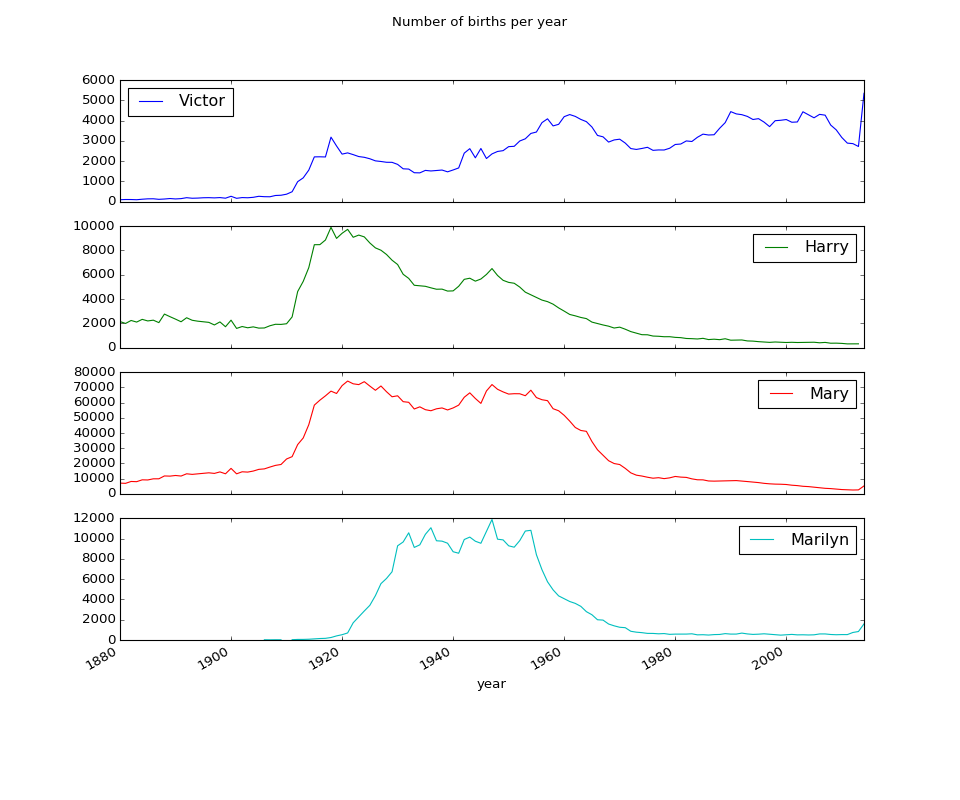

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08dacdf110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f08aa3cd210>], dtype=object)

In [52]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [55]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<IPython.core.display.Javascript object>


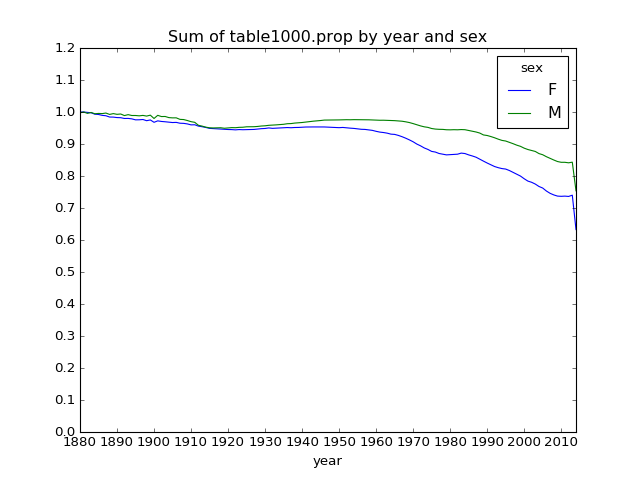

In [57]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [58]:
df = boys[boys.year == 2010]

In [59]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1710685        Jacob   M   22095  2010  0.011540
         1710686        Ethan   M   17993  2010  0.009398
         1710687      Michael   M   17324  2010  0.009048
         1710688       Jayden   M   17158  2010  0.008962
         1710689      William   M   17036  2010  0.008898
         1710690    Alexander   M   16746  2010  0.008746
         1710691         Noah   M   16438  2010  0.008585
         1710692       Daniel   M   15819  2010  0.008262
         1710693        Aiden   M   15520  2010  0.008106
         1710694      Anthony   M   15475  2010  0.008083
         1710695       Joshua   M   15425  2010  0.008056
         1710696        Mason   M   14836  2010  0.007749
         1710697  Christopher   M   14259  2010  0.007447
         1710698       Andrew   M   14227  2010  0.007431
         1710699        David   M   14176  2010  0.007404
         1710700      Matthew   M   14114  2010  0.007372
         1710701        Logan   M   14014  2010  0.007319
         1710702       Elijah   M   13875  2010  0.007247
         1710703        James   M   13861  2010  0.007240
         1710704       Joseph   M   13806  2010  0.007211
         1710705      Gabriel   M   12859  2010  0.006716
         1710706     Benjamin   M   12421  2010  0.006487
         1710707         Ryan   M   11964  2010  0.006249
         1710708       Samuel   M   11948  2010  0.006240
         1710709      Jackson   M   11812  2010  0.006169
         1710710         John   M   11543  2010  0.006029
         1710711       Nathan   M   11367  2010  0.005937
         1710712     Jonathan   M   11113  2010  0.005804
         1710713    Christian   M   11084  2010  0.005789
         1710714         Liam   M   10924  2010  0.005706
...                       ...  ..     ...   ...       ...
         1711656      Ronaldo   M     203  2010  0.000106
         1711657         Yair   M     203  2010  0.000106
         1711654         Kael   M     203  2010  0.000106
         1711658       Gibson   M     202  2010  0.000106
         1711659        Keyon   M     202  2010  0.000106
         1711660       Reagan   M     202  2010  0.000106
         1711661     Kingsley   M     201  2010  0.000105
         1711662        Talan   M     201  2010  0.000105
         1711663       Yehuda   M     201  2010  0.000105
         1711667       Jordon   M     200  2010  0.000104
         1711669        Slade   M     200  2010  0.000104
         1711668      Sheldon   M     200  2010  0.000104
         1711666       Daylen   M     200  2010  0.000104
         1711665      Dashawn   M     200  2010  0.000104
         1711664    Cristofer   M     200  2010  0.000104
         1711670     Clarence   M     199  2010  0.000104
         1711671        Kadin   M     199  2010  0.000104
         1711672        Masen   M     199  2010  0.000104
         1711673        Rowen   M     199  2010  0.000104
         1711674      Clinton   M     198  2010  0.000103
         1711675       Dillan   M     198  2010  0.000103
         1711676     Thaddeus   M     198  2010  0.000103
         1711677       Yousef   M     198  2010  0.000103
         1711678       Truman   M     197  2010  0.000103
         1711683       Joziah   M     196  2010  0.000102
         1711686       Simeon   M     196  2010  0.000102
         1711685       Reuben   M     196  2010  0.000102
         1711684      Keshawn   M     196  2010  0.000102
         1711680       Destin   M     196  2010  0.000102
         1711682        Enoch   M     196  2010  0.000102

[1000 rows x 5 columns]

In [60]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [61]:
prop_cumsum[:10]

year  sex         
2010  M    1710685    0.011540
           1710686    0.020938
           1710687    0.029986
           1710688    0.038947
           1710689    0.047845
           1710690    0.056592
           1710691    0.065177
           1710692    0.073439
           1710693    0.081545
           1710694    0.089628
Name: prop, dtype: float64

In [62]:
df = boys[boys.year == 1900]

In [64]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [65]:
in1900.searchsorted(0.5) + 1

array([25])

In [68]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [69]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [70]:
diversity = diversity.unstack('sex')

In [74]:
diversity

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]
1885,[40],[16]
1886,[41],[16]
1887,[41],[17]
1888,[42],[17]


<IPython.core.display.Javascript object>


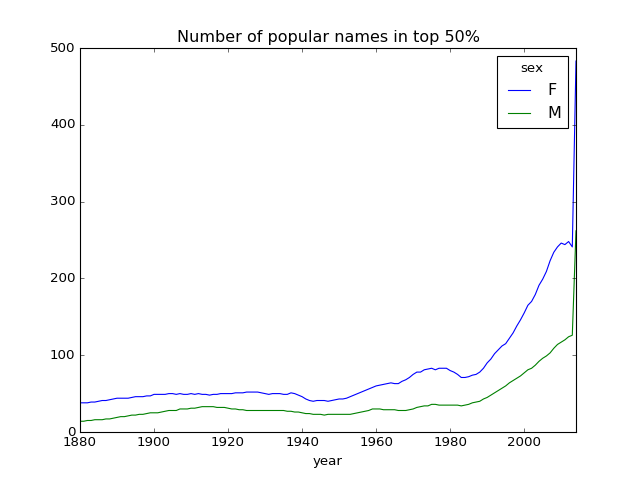

In [80]:
diversity[['F', 'M']] = diversity[['F', 'M']].astype(int)
diversity.dtypes

diversity.plot(title = 'Number of popular names in top 50%')

## Revolution "the last letter"

In [81]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [83]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [84]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                 NaN     694.0     454.0    411.0    3912.0   39229.0
c                 5.0      49.0     954.0    482.0   15463.0   23325.0
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0

In [85]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022121.0
     2010    1773440.0
M    1910     194216.0
     1960    2132756.0
     2010    1914629.0
dtype: float64

In [86]:
letter_prop = subtable / subtable.sum().astype(float)

<IPython.core.display.Javascript object>


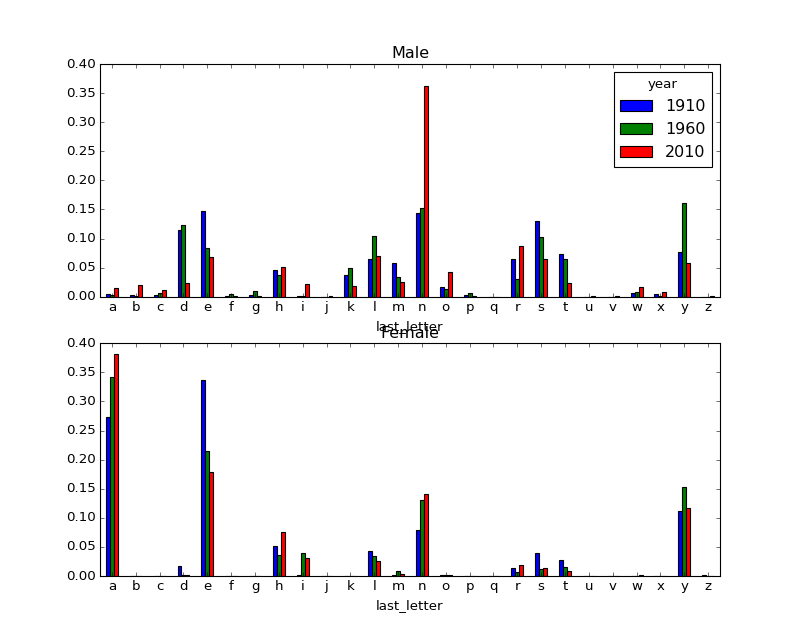

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [88]:
letter_prop = table / table.sum().astype(float)

In [89]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [90]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


<IPython.core.display.Javascript object>


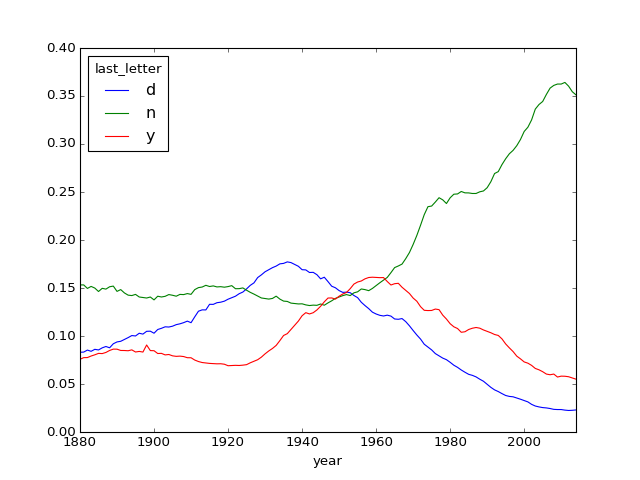

In [91]:
dny_ts.plot()

## Men's names have become women and vice versa

In [92]:
all_names = top1000.name.unique()

In [93]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [94]:
lesley_like = all_names[mask]

In [97]:
np.array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [98]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [100]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376158
Lesly      11155
Name: births, dtype: int64

In [101]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [102]:
table = table.div(table.sum(1), axis=0)

In [103]:
table.tail()

sex,F,M
year,,
2010,1.0,NaN
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN


<IPython.core.display.Javascript object>


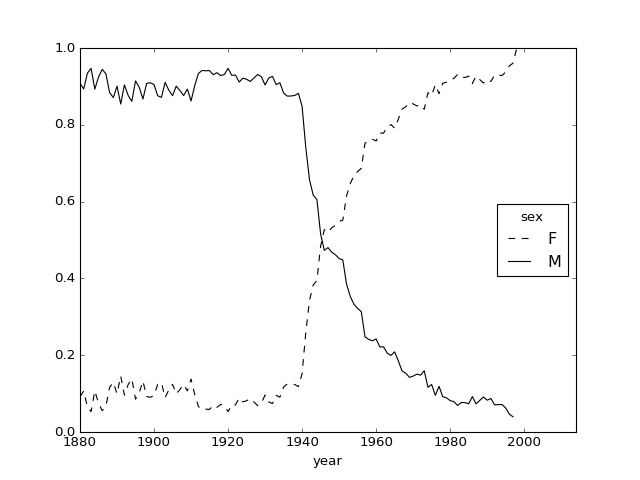

In [104]:
table.plot(style={'M': 'k-', 'F': 'k--'})